In [1]:
import torch

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision.models as models
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import os

Files already downloaded and verified
Files already downloaded and verified


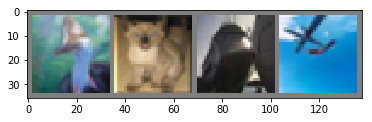

 bird   cat  ship plane


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root="./data",train=True,
                                        download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,
                                          shuffle=True,num_workers=2)
testset = torchvision.datasets.CIFAR10(root="./data",train=True,
                                       download=True,transform=transform)
testloader = torch.utils.data.DataLoader(trainset,batch_size=4,
                                         shuffle=False,num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
    
# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#存放结果（存放数据）
def save_log(file_index = 1,epoch = 1,i = 100,running_loss = 1,
             experiment_name = "test",clear_or_not = False):
        
    folder = experiment_name + "/" 
    filename = "result" + str(file_index) + ".txt" 

    file_target = folder + filename
    
    if not os.path.exists(folder):
        os.makedirs(folder)
    
    if(clear_or_not == True):
        f = open(file_target,"w") 
        f.write("")
        print("Clear: " + file_target)
    else:
        f = open(file_target,"a") 
        print('[%2d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss))
        f.write('[%2d, %5d] loss: %.3f\n' % (epoch + 1, i + 1, running_loss))
    
    f.close()    
    
#test:
# save_log(file_index = 2,epoch = 2,i = 1000,running_loss = 2.5,experiment_name = "conv_channel",clear_or_not = False)

In [4]:
def train(epochs = 1, period = 1000,epoch_start = 0,net = None,optimizer = None,
          experiment_name = "test",log_index = 1):
    
    print("Train net: ")
    print(net)
    
    for epoch in range(epochs):
        save_log(file_index = log_index,experiment_name = experiment_name,clear_or_not=True)
    
    for epoch in range(epoch_start,epoch_start+epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net.forward(inputs)                   #前向传播
            loss = criterion(outputs, labels)       #损失函数比较outputs与labels，得到loss
            loss.backward()                         #后向传播
            optimizer.step()                        

            # print statistics
            running_loss += loss.item()
#             print(running_loss)

            if i % period == period-1:    # print every "period" mini-batches
                
                save_log(file_index = log_index,epoch = epoch,i = i,running_loss = running_loss/period,
                         experiment_name = experiment_name,clear_or_not = False)
                running_loss = 0.0

    PATH = experiment_name + "/net" + str(log_index) + ".pth"   #存储网络
    torch.save(net.state_dict(), PATH)
    
    print('Finished Training')
    

In [5]:
epochs = 3
period = 500

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5,padding = 2)
        self.pool = nn.MaxPool2d(2, 2)        
        self.conv3 = nn.Conv2d(6, 6, 5,padding = 1)        
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))        
        x = F.relu(self.conv3(x))        
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(6, 6, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

train(epochs = epochs, period = period,epoch_start = 0,net = net,optimizer = optimizer,
          experiment_name = "net1",log_index = 1)    

In [147]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 6)
        self.pool = nn.MaxPool2d(5, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x    

In [148]:
net2 = Net2()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net2.parameters(), lr=0.001, momentum=0.9)

train(epochs = epochs, period = period,epoch_start = 0,net = net2,optimizer = optimizer,
          experiment_name = "net2",log_index = 1)   

Train net: 
Net2(
  (conv1): Conv2d(3, 16, kernel_size=(6, 6), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Clear: net2/result1.txt
Clear: net2/result1.txt
Clear: net2/result1.txt
[ 1,   500] loss: 2.278
[ 1,  1000] loss: 2.139
[ 1,  1500] loss: 1.979
[ 1,  2000] loss: 1.859
[ 1,  2500] loss: 1.743
[ 1,  3000] loss: 1.689
[ 1,  3500] loss: 1.653
[ 1,  4000] loss: 1.608
[ 1,  4500] loss: 1.539
[ 1,  5000] loss: 1.537
[ 1,  5500] loss: 1.511
[ 1,  6000] loss: 1.434
[ 1,  6500] loss: 1.487
[ 1,  7000] loss: 1.471
[ 1,  7500] loss: 1.400
[ 1,  8000] loss: 1.396
[ 1,  8500] loss: 1.409
[ 1,  9000] loss: 1.390
[ 1,  9500] loss: 1.370
[ 1, 10000] loss: 1.359
[ 1, 10500] loss: 1.322
[ 1, 11000] loss: 1.343
[ 1, 11500] loss: 1.287
[ 1, 12000] loss: 1.318
[ 1,

In [14]:
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)                
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [173]:
net3 = Net3()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net3.parameters(), lr=0.001, momentum=0.9)

train(epochs = epochs, period = period,epoch_start = 0,net = net3,optimizer = optimizer,
          experiment_name = "net3",log_index = 1) 

Train net: 
Net3(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Clear: net3/result1.txt
Clear: net3/result1.txt
Clear: net3/result1.txt
[ 1,   500] loss: 2.304
[ 1,  1000] loss: 2.299
[ 1,  1500] loss: 2.244
[ 1,  2000] loss: 2.078
[ 1,  2500] loss: 1.987
[ 1,  3000] loss: 1.889
[ 1,  3500] loss: 1.823
[ 1,  4000] loss: 1.788
[ 1,  4500] loss: 1.665
[ 1,  5000] loss: 1.680
[ 1,  5500] loss: 1.676
[ 1,  6000] loss: 1.598
[ 1,  6500] loss: 1.566
[ 1,  7000] loss: 1.577
[ 1,  7500] loss: 1.544
[ 1,  8000] loss: 1.600
[ 1,  8500] loss: 1.557
[ 1,  9000] loss: 1.551
[ 1,  9500] loss: 1.532
[ 1, 10000] loss: 1.494
[ 1, 10500] loss: 1.476
[ 1, 11000] loss:

In [85]:
class Net4(nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.conv1 = nn.Conv2d(3, 12, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(12, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.tanh(self.conv1(x)))
        x = self.pool(torch.tanh(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

net4 = Net4()

criterion = nn.CrossEntropyLoss()
optimizer4 = optim.SGD(net4.parameters(), lr=0.001, momentum=0.9)

train(epochs = epochs, period = period,epoch_start = 0,net = net4,optimizer = optimizer4,
          experiment_name = "net4",log_index = 1) 

Train net: 
Net4(
  (conv1): Conv2d(3, 12, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Clear: net4/result1.txt
Clear: net4/result1.txt
Clear: net4/result1.txt
Finished Training


In [6]:
def read_log(file_index = 1,experiment_name = 'test'):
    result_buffer = []
    folder = experiment_name + "/" 
    filename = "result" + str(file_index) + ".txt" 

    file_target = folder + filename
    
    print("file_target is: " + file_target)

    f1 = open(file_target,'r')
    for line in f1:
#         print(line)
#         print(int(line[1:3]))
#         print(int(line[4:10]))        
#         print(line[18:23])
#         index[curve].append(int(line[4:10])+int((int(line[1:3])-1-curve*2)*(12500)))
        result_buffer.append(float(line[18:23]))
    f1.close()
    return result_buffer

file_target is: net2/result1.txt
file_target is: net3/result1.txt
file_target is: net1/result1.txt


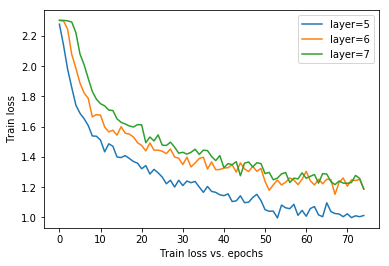

In [7]:
curves = 3
index = [[] for _ in range(curves)]
result = [[] for _ in range(curves)]

index_list = [1,1,1,1]
folder_list = ['net2','net3','net1','net4']
label_list = ['layer=5','layer=6','layer=7','tanh']

for i in range(curves):
    result[i] = read_log(file_index = index_list[i],experiment_name = folder_list[i])
#     print(result[i])
    plt.plot(range(len(result[i])), result[i],label = label_list[i])

    
# plt.plot(index, result, 'o',label=label)
plt.xlabel('Train loss vs. epochs')
plt.ylabel('Train loss')

plt.legend(loc='best')
plt.show()


In [19]:
def get_trainable_parameter_number(mynet):
    trainable_num = sum(p.numel() for p in mynet.parameters() if p.requires_grad)
    return trainable_num

In [20]:
def get_parameter_number(mynet):
    total_num = sum(p.numel() for p in mynet.parameters())
    return total_num

In [31]:
def print_model_parm_flops(mynet):

    list_conv=[]
    def conv_hook(self, input, output):
        batch_size, input_channels, input_height, input_width = input[0].size()
        output_channels, output_height, output_width = output[0].size()

        kernel_ops = self.kernel_size[0] * self.kernel_size[1] * (self.in_channels / self.groups)
        
        bias_ops = 1 if self.bias is not None else 0

        params = output_channels * (kernel_ops + bias_ops)
        flops = batch_size * params * output_height * output_width

        list_conv.append(flops)

    list_linear=[] 
    def linear_hook(self, input, output):
        batch_size = input[0].size(0) if input[0].dim() == 2 else 1

        weight_ops = self.weight.nelement()
        bias_ops = self.bias.nelement()

        flops = batch_size * (weight_ops + bias_ops)
        list_linear.append(flops)

    list_bn=[] 
    def bn_hook(self, input, output):
        list_bn.append(input[0].nelement())

    list_relu=[] 
    def relu_hook(self, input, output):
        list_relu.append(input[0].nelement())

    list_pooling=[]
    def pooling_hook(self, input, output):
        batch_size, input_channels, input_height, input_width = input[0].size()
        output_channels, output_height, output_width = output[0].size()

        kernel_ops = self.kernel_size * self.kernel_size
        bias_ops = 0
        params = output_channels * (kernel_ops + bias_ops)
        flops = batch_size * params * output_height * output_width

        list_pooling.append(flops)
            
    def foo(net):
        childrens = list(net.children())
        if not childrens:
            if isinstance(net, torch.nn.Conv2d):
                net.register_forward_hook(conv_hook)
            if isinstance(net, torch.nn.Linear):
                net.register_forward_hook(linear_hook)
            if isinstance(net, torch.nn.BatchNorm2d):
                net.register_forward_hook(bn_hook)
            if isinstance(net, torch.nn.ReLU):
                net.register_forward_hook(relu_hook)
            if isinstance(net, torch.nn.MaxPool2d) or isinstance(net, torch.nn.AvgPool2d):
                net.register_forward_hook(pooling_hook)
            return
        for c in childrens:
                foo(c)

    foo(mynet)
    input = Variable(torch.rand(3,32,32).unsqueeze(0), requires_grad = True)
    out = mynet(input)


    total_flops = (sum(list_conv) + sum(list_linear) + sum(list_bn) + sum(list_relu) + sum(list_pooling))
    
    print('  + Number of FLOPs: %d' % (total_flops))

In [32]:
def print_layers_num(mynet):
    def foo(net):
        childrens = list(net.children())
        if not childrens:
            if isinstance(net, torch.nn.Conv2d):
                pass
                #可以用来统计不同层的个数
                # net.register_backward_hook(print)
            return 1
        count = 0
        for c in childrens:
                count += foo(c)
        return count
    print(foo(mynet))


In [33]:
#读取网络
net_test = Net3()

experiment_name = "net3"
log_index = 1

PATH = experiment_name + "/net" + str(log_index) + ".pth"
net_test.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [34]:
print_layers_num(net_test)
print_model_parm_nums(net_test)
print(get_parameter_number(net_test))
print_model_parm_flops(net_test)

6
  + Number of params: 62006
62006
45
45
45
  + Number of FLOPs: 664542


In [176]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net_test(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 61 %


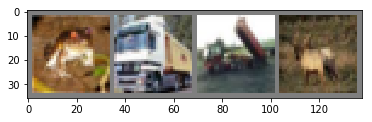

GroundTruth:   frog truck truck  deer
Predicted:   frog truck truck  frog


In [177]:
#测试4张图片
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net_test(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [178]:
#给出分类别的准确率
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net_test(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 69 %
Accuracy of   car : 77 %
Accuracy of  bird : 41 %
Accuracy of   cat : 35 %
Accuracy of  deer : 61 %
Accuracy of   dog : 55 %
Accuracy of  frog : 74 %
Accuracy of horse : 58 %
Accuracy of  ship : 70 %
Accuracy of truck : 67 %
